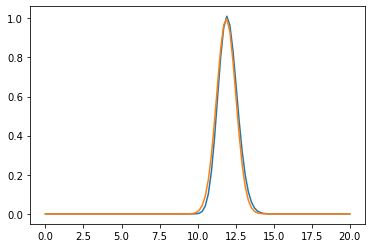

In [26]:
from advectionGP import Model, FixedSensorModel, EQ
import numpy as np

X = np.array([[0,10,3,5]])
y = np.array([12])

boundary = ([0,0,0],[20,20,20])
k = EQ(1.0, 2.0)
sensors = FixedSensorModel(X,2)
m = Model(resolution=[100,100,100],boundary=boundary,N_feat=15,noiseSD=5.0,kernel=k,sensormodel=sensors,u=0.09,k_0=0.01)

dt,dx,dy,dx2,dy2,Nt,Nx,Ny = m.getGridStepSize()
source = np.zeros(m.resolution)
source[0,int(Nx/2),int(Ny/2)] = 1.0
import matplotlib.pyplot as plt
%matplotlib inline
estimated_concentration = m.computeConcentration(source)

x = np.linspace(boundary[0][0],boundary[1][0],Nx)
t = ((Nt-1)/m.resolution[0])*m.boundary[1][0]
new_centre = (m.boundary[1][1]+dx)/2+m.u*t
c = np.exp(-(x-new_centre)**2/(4*m.k_0*t))

conc_snapshot = estimated_concentration[Nt-1,int(Nx/2),:].copy()
conc_snapshot/=np.sum(conc_snapshot)
conc_snapshot*=np.sum(c)
plt.plot(x,conc_snapshot)
plt.plot(x,c)

#plt.xlim([10.5,12.5])

In [31]:
np.sum(estimated_concentration[2,:,:])/dt

1.0

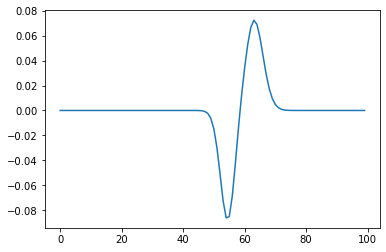

In [176]:
estimated_concentration[Nt-1,int(Nx/2),:],c

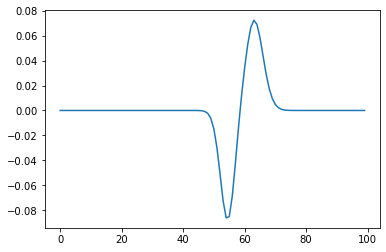

In [173]:
plt.plot(estimated_concentration[Nt-1,int(Nx/2),:]-c)

In [122]:
new_centre

array([10.6, 10.6, 10.6])

In [40]:
np.sum(m.computeConcentration(source)[20,:,:])

0.0717167038581259

In [34]:
m.getGridStepSize()

(0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.0044444444444444444,
 0.0044444444444444444,
 300,
 300,
 300)

[[0. 2. 4.]]
0 200 40 80 80 120
[ 0 10  3  5] 
 1.0000000000000002


8000.0

In [12]:
np.sum(h>0)

1

In [4]:
m.getGridCoord(np.array([[9,9,9],[5,0,0]]))

array([[10, 10, 10],
       [ 6,  0,  0]])

In [7]:
X[4:4,:]

array([], shape=(0, 4), dtype=int64)

In [6]:
X[:,[0,2,3]]

array([[0, 3, 4],
       [0, 6, 7],
       [0, 3, 7],
       [0, 6, 4],
       [2, 3, 4],
       [2, 6, 7],
       [2, 3, 7],
       [2, 6, 4]])

In [1]:
for h in sensors.getHs():
    print(h)

NameError: name 'sensors' is not defined

In [2]:
tloc = np.linspace(boundary[0][2],boundary[1][2],16)
xloc=np.linspace(0.5,7.5,5)
yloc=np.linspace(0.5,7.5,5)
sensN = len(xloc)*len(yloc)
obsN = len(tloc)
coords = np.asarray(np.meshgrid(xloc,yloc)).reshape(2,sensN)

In [3]:
coords.shape

(2, 25)